# Italia - Cina (Hubei)

Confronto tra i trend italiano e cinese (provincia di Hubei).

## Fonti
* Dati italiani: Protezione Civile Italia <https://github.com/pcm-dpc/COVID-19>
* Dati cinesi: Johns Hopkins CSSE <https://github.com/CSSEGISandData/COVID-19>

Codice rilasciato in licenza MIT: <https://opensource.org/licenses/MIT>

Autore: *Emanuele Zeppieri*

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Century Schoolbook']
rcParams['font.size'] = 15
rcParams['figure.dpi'] = 300
from matplotlib.markers import CARETDOWNBASE, CARETUPBASE
import matplotlib.dates as mdates

from datetime import date, datetime, timedelta

%load_ext autoreload
%autoreload 2

In [3]:
ITA_SOURCE = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
CHN_SOURCE = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

In [5]:
# Italy data load
ds_it = pd.read_csv(ITA_SOURCE, parse_dates=['data'])
ds_it['data'] = ds_it['data'].dt.date
ds_it.set_index('data', inplace=True)

# China data load & cleaning
ds_jhcsse = pd.read_csv(CHN_SOURCE)
hubei_row = ds_jhcsse.loc[ds_jhcsse['Province/State'] == 'Hubei'].copy()
hubei_row.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
ds_hubei = hubei_row.transpose(copy=True).rename(columns={154: 'totale_casi_hubei'})
ds_hubei.index = pd.to_datetime(ds_hubei.index).date
ds_hubei.index.rename('data', inplace=True)

In [6]:
# Merge & align lockdown dates
SHIFT_DAYS = -45

ds_sided = pd.merge(left=ds_hubei, right=ds_it['totale_casi'], on='data', how='outer')
ds_sided['totale_casi'] = ds_sided['totale_casi'].shift(periods=SHIFT_DAYS)

# Drop last (NaN) row
ds_sided.drop(ds_sided.tail(1).index, inplace=True)

# Check
ds_sided

,totale_casi_hubei,totale_casi
data,,
2020-01-22,444,5883.0
2020-01-23,444,7375.0
2020-01-24,549,9172.0
2020-01-25,761,10149.0
2020-01-26,1058,12462.0
2020-01-27,1423,15113.0
2020-01-28,3554,17660.0
2020-01-29,3554,21157.0
2020-01-30,4903,24747.0


In [8]:
# Build short df and cast index to integer (days)
start_date = np.datetime64('2020-01-24')
end_short_period_date = np.datetime64('2020-02-12')

df_sided_plot_long = ds_sided[(ds_sided.index >= start_date)].copy()
df_sided_plot_short = ds_sided[(ds_sided.index >= start_date) & (ds_sided.index <= end_short_period_date)].copy()

df_sided_plot_long.index = (df_sided_plot_long.index.astype('datetime64[ns]') - start_date).days + 1
df_sided_plot_short.index = (df_sided_plot_short.index.astype('datetime64[ns]') - start_date).days + 1

#df_sided_plot_long

In [56]:
# Fixing Hubei data & scaling Italian data
HUBEI_FIX_FACTOR = 48206/33366
ITALIAN_SCALING_FACTOR = 793/9172
df_sided_plot_short['totale_casi_hubei_fixed'] = (df_sided_plot_short['totale_casi_hubei'] * HUBEI_FIX_FACTOR)
df_sided_plot_short['totale_casi_scaled'] = (df_sided_plot_short['totale_casi'] * ITALIAN_SCALING_FACTOR)

df_sided_plot_short.loc[:, ['totale_casi_hubei', 'totale_casi_hubei_fixed', 'totale_casi', 'totale_casi_scaled']]

,totale_casi_hubei,totale_casi_hubei_fixed,totale_casi,totale_casi_scaled
data,,,,
1,549,793.175508,9172.0,793.000000
2,761,1099.465504,10149.0,877.470235
3,1058,1528.560451,12462.0,1077.449411
4,1423,2055.899359,15113.0,1306.651657
5,3554,5134.691722,17660.0,1526.862189
6,3554,5134.691722,21157.0,1829.208570
7,4903,7083.678535,24747.0,2139.595617
8,5806,8388.300545,27980.0,2419.116877
9,7153,10334.397830,31506.0,2723.970563


In [57]:
SUBTITLE = 'Dati Italia: https://github.com/pcm-dpc/COVID-19 - Dati Cina: https://github.com/CSSEGISandData/COVID-19 \nCodice: https://github.com/emazep/COVID-19-Statistics'
common_plt_params = {'markersize':8, 'linewidth':4}

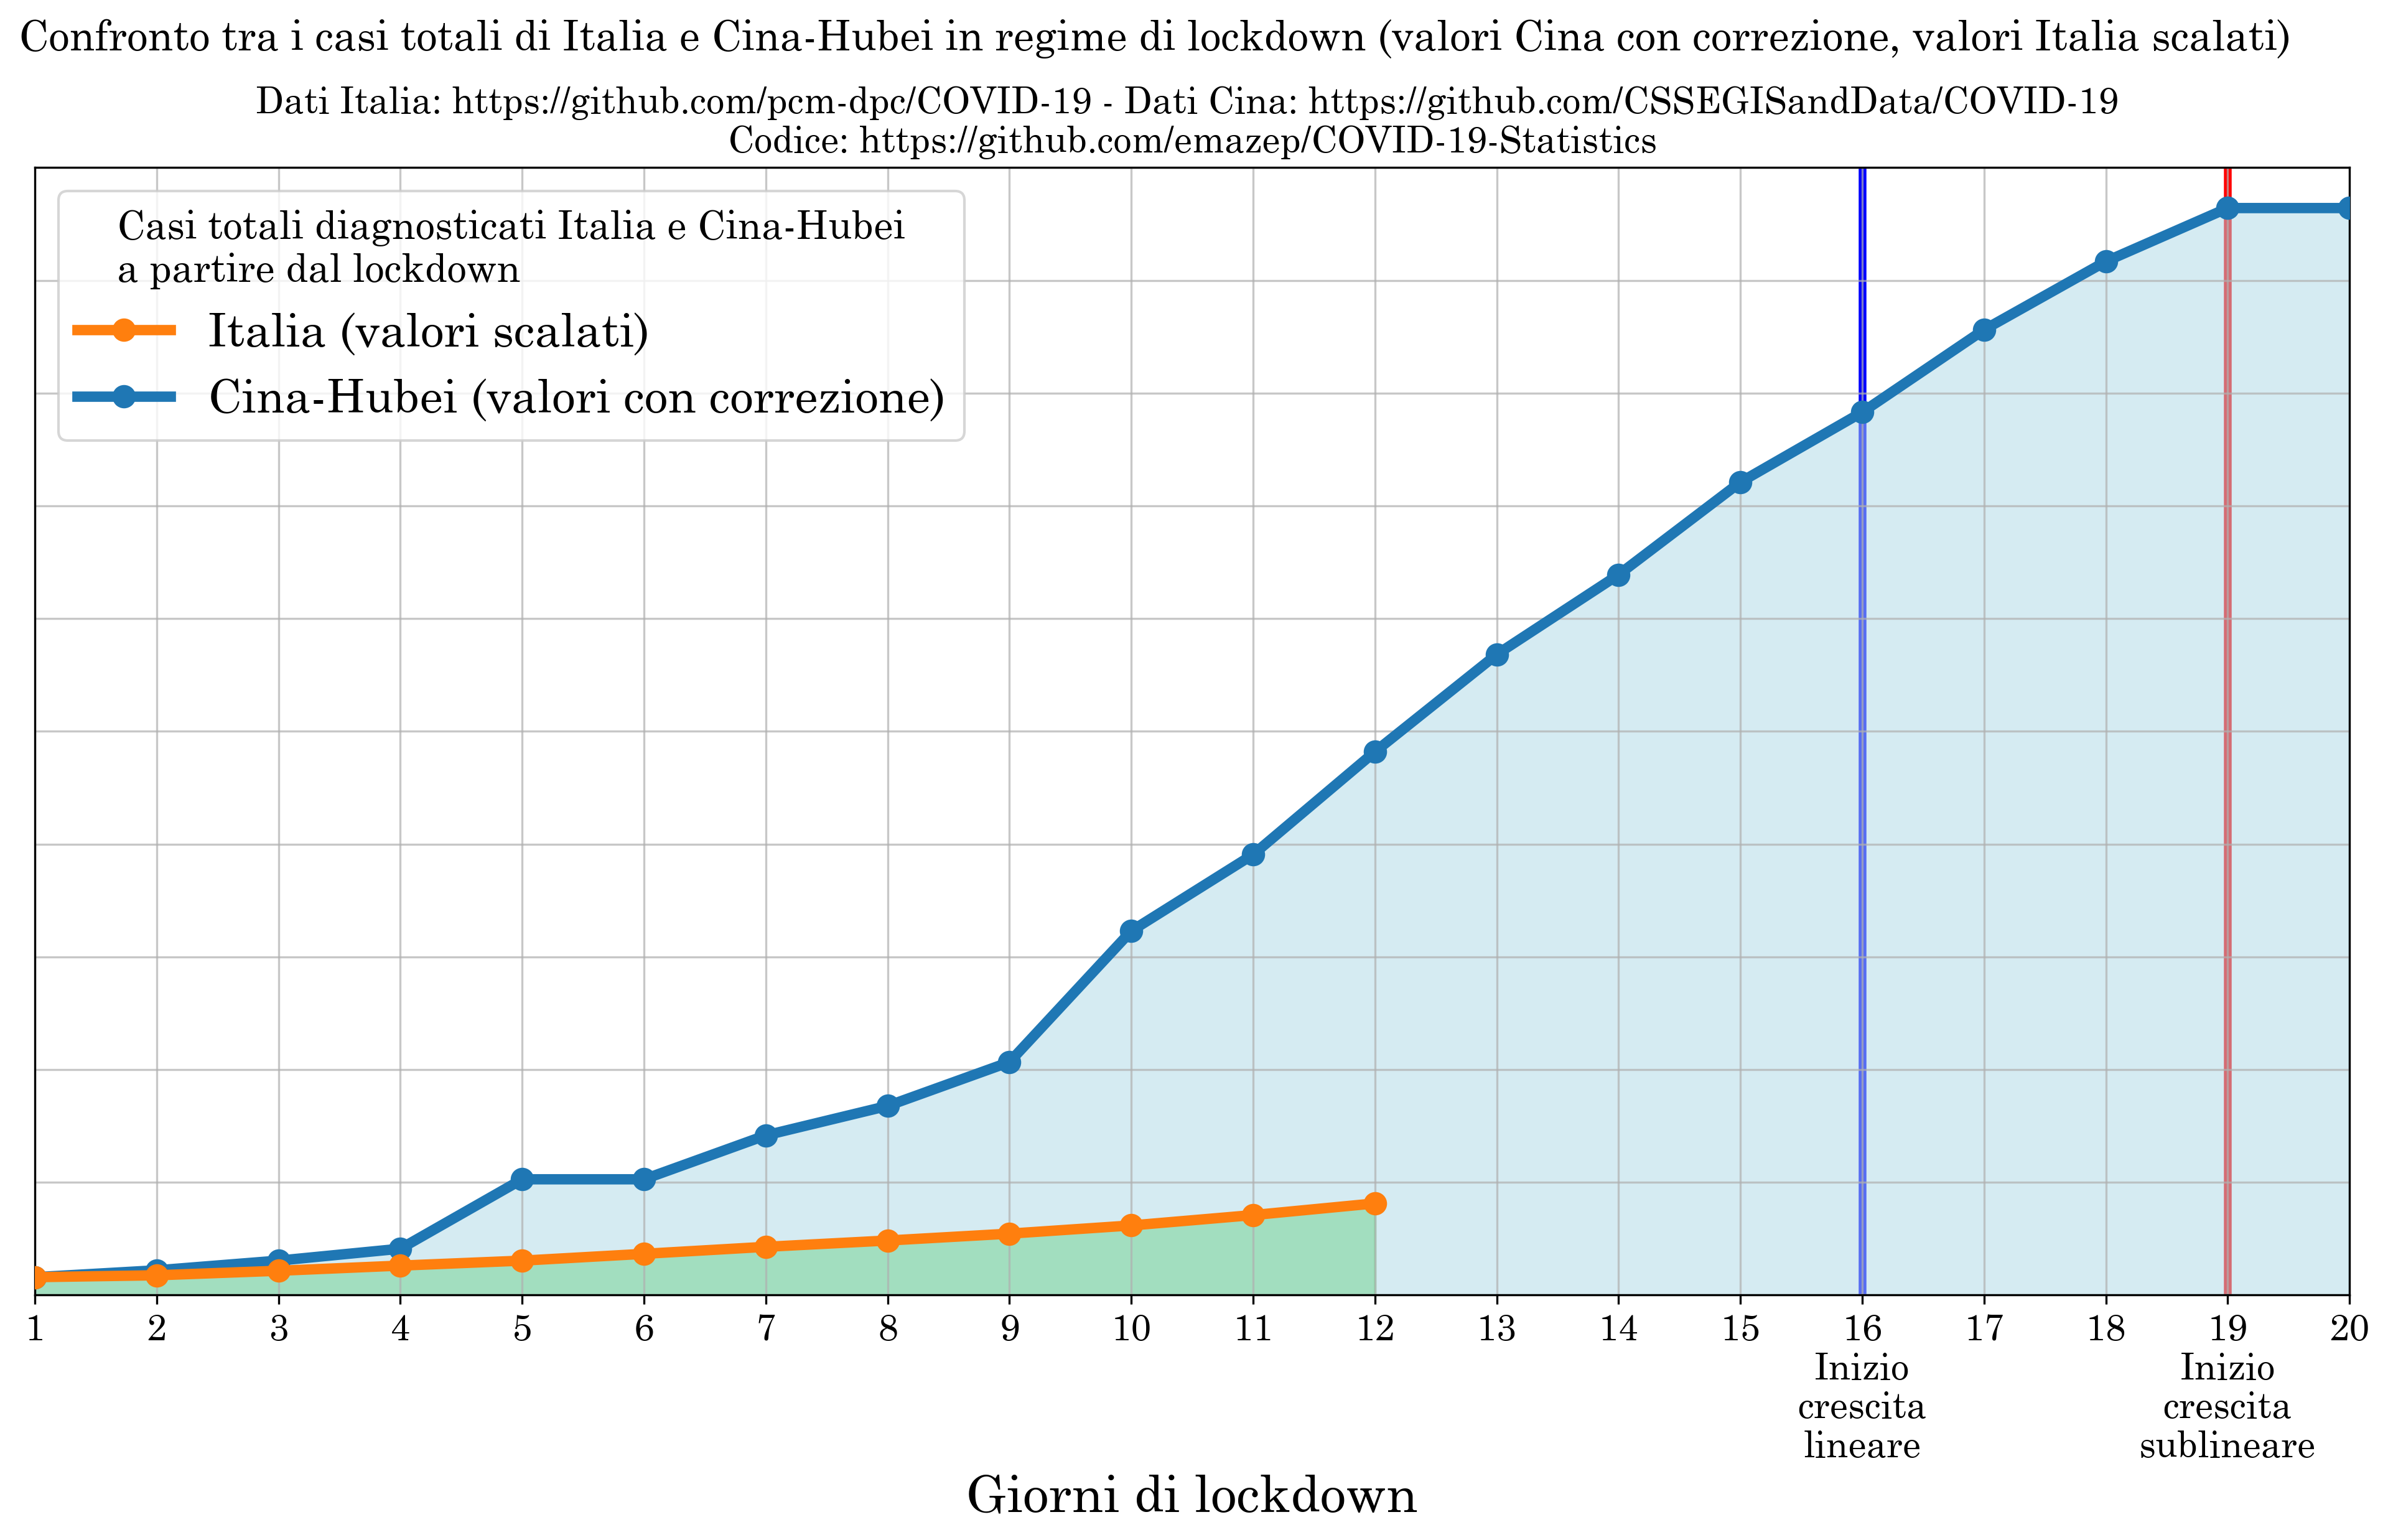

In [75]:
# Growth factor
SLACK = 0.5
ALPHA = 0.7

ax = df_sided_plot_short.plot(
    y=['totale_casi_hubei_fixed', 'totale_casi_scaled'], label=['Cina-Hubei (valori con correzione)', 'Italia (valori scalati)'], **common_plt_params, marker='o', figsize=(16, 8), zorder=3
)
plt.fill_between(df_sided_plot_short.index, df_sided_plot_short['totale_casi_scaled'], color='limegreen', alpha=0.5)
plt.fill_between(df_sided_plot_short.index, df_sided_plot_short['totale_casi_hubei_fixed'], color='lightblue', alpha=0.5)

ax.tick_params(axis='x', which='both', labelsize=14)
plt.xticks(range(1,21), list(range(1,16))+['16\nInizio\ncrescita\nlineare']+list(range(17,19))+['19\nInizio\ncrescita\nsublineare']+list(range(20,21)))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

'''
ax.yaxis.set_major_locator(ticker.MultipleLocator(10_000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))
ax.tick_params(axis='y', which='both', labelsize=14)
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.ylabel('Casi totali Cina-Hubei corretti')
'''
ax.yaxis.set_major_locator(ticker.MultipleLocator(5_000))
ax.tick_params( axis='y', which='both', left=False)
ax.set_yticklabels([])

ax.grid(which='both', alpha=ALPHA)

plt.axvline(x=16, linewidth=3, zorder=0, color='blue')
plt.axvline(x=19, linewidth=3, zorder=0, color='red')
plt.ylim(bottom=0, top=50_000)
plt.xlabel('Giorni di lockdown', fontsize=20)

ax.set_title(SUBTITLE, fontsize=14)
plt.suptitle('Confronto tra i casi totali di Italia e Cina-Hubei in regime di lockdown (valori Cina con correzione, valori Italia scalati)', fontsize=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="Casi totali diagnosticati Italia e Cina-Hubei\na partire dal lockdown", fontsize=18)

fig_ita_chn_corrected_scaled = plt.gcf()

plt.show()

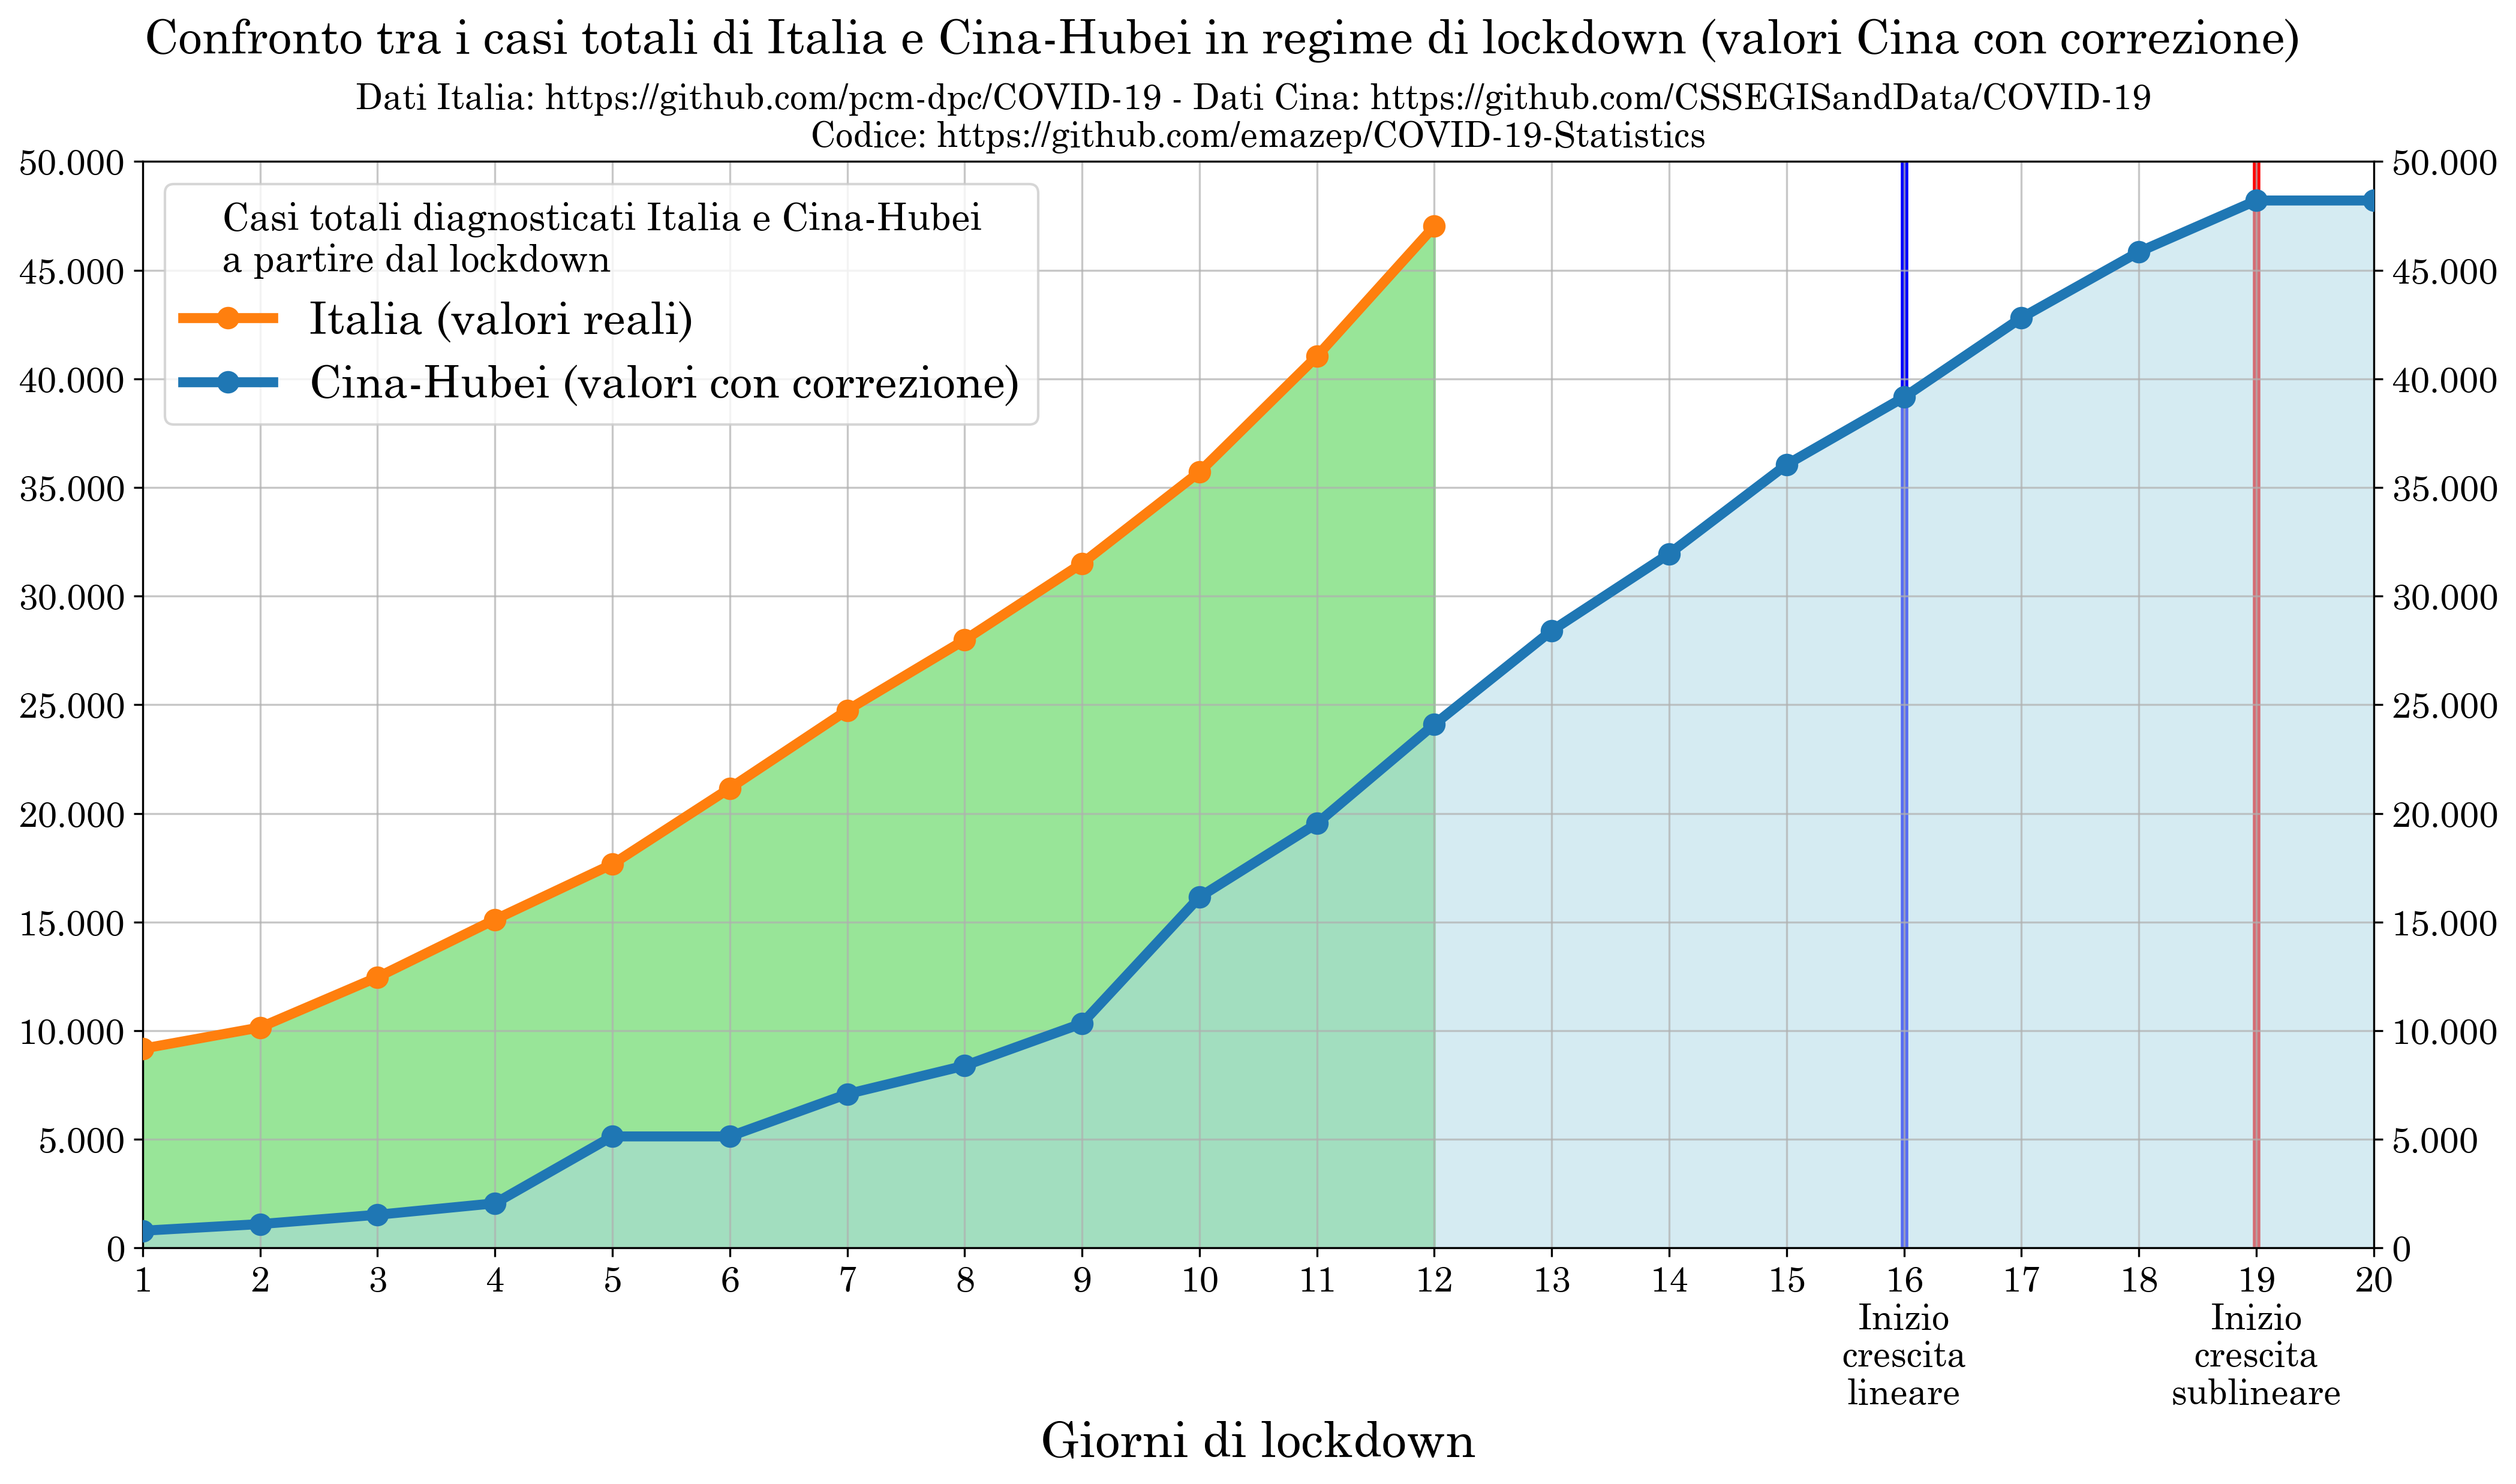

In [76]:
# Growth factor
SLACK = 0.5
ALPHA = 0.7

ax = df_sided_plot_short.plot(
    y=['totale_casi_hubei_fixed', 'totale_casi'], label=['Cina-Hubei (valori con correzione)', 'Italia (valori reali)'], **common_plt_params, marker='o', figsize=(16, 8), zorder=3
)
plt.fill_between(df_sided_plot_short.index, df_sided_plot_short['totale_casi'], color='limegreen', alpha=0.5)
plt.fill_between(df_sided_plot_short.index, df_sided_plot_short['totale_casi_hubei_fixed'], color='lightblue', alpha=0.5)

ax.tick_params(axis='x', which='both', labelsize=14)
plt.xticks(range(1,21), list(range(1,16))+['16\nInizio\ncrescita\nlineare']+list(range(17,19))+['19\nInizio\ncrescita\nsublineare']+list(range(20,21)))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5_000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))
ax.tick_params(axis='y', which='both', labelsize=14)

ax.grid(which='both', alpha=ALPHA)
ax.tick_params(axis='y', which='both', right=True, labelright=True)

plt.axvline(x=16, linewidth=3, zorder=0, color='blue')
plt.axvline(x=19, linewidth=3, zorder=0, color='red')

plt.ylim(bottom=0, top=50_000)
plt.xlabel('Giorni di lockdown', fontsize=20)

ax.set_title(SUBTITLE, fontsize=14)
plt.suptitle('Confronto tra i casi totali di Italia e Cina-Hubei in regime di lockdown (valori Cina con correzione)', fontsize=19)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="Casi totali diagnosticati Italia e Cina-Hubei\na partire dal lockdown", fontsize=18)

fig_ita_chn_corrected = plt.gcf()

plt.show()

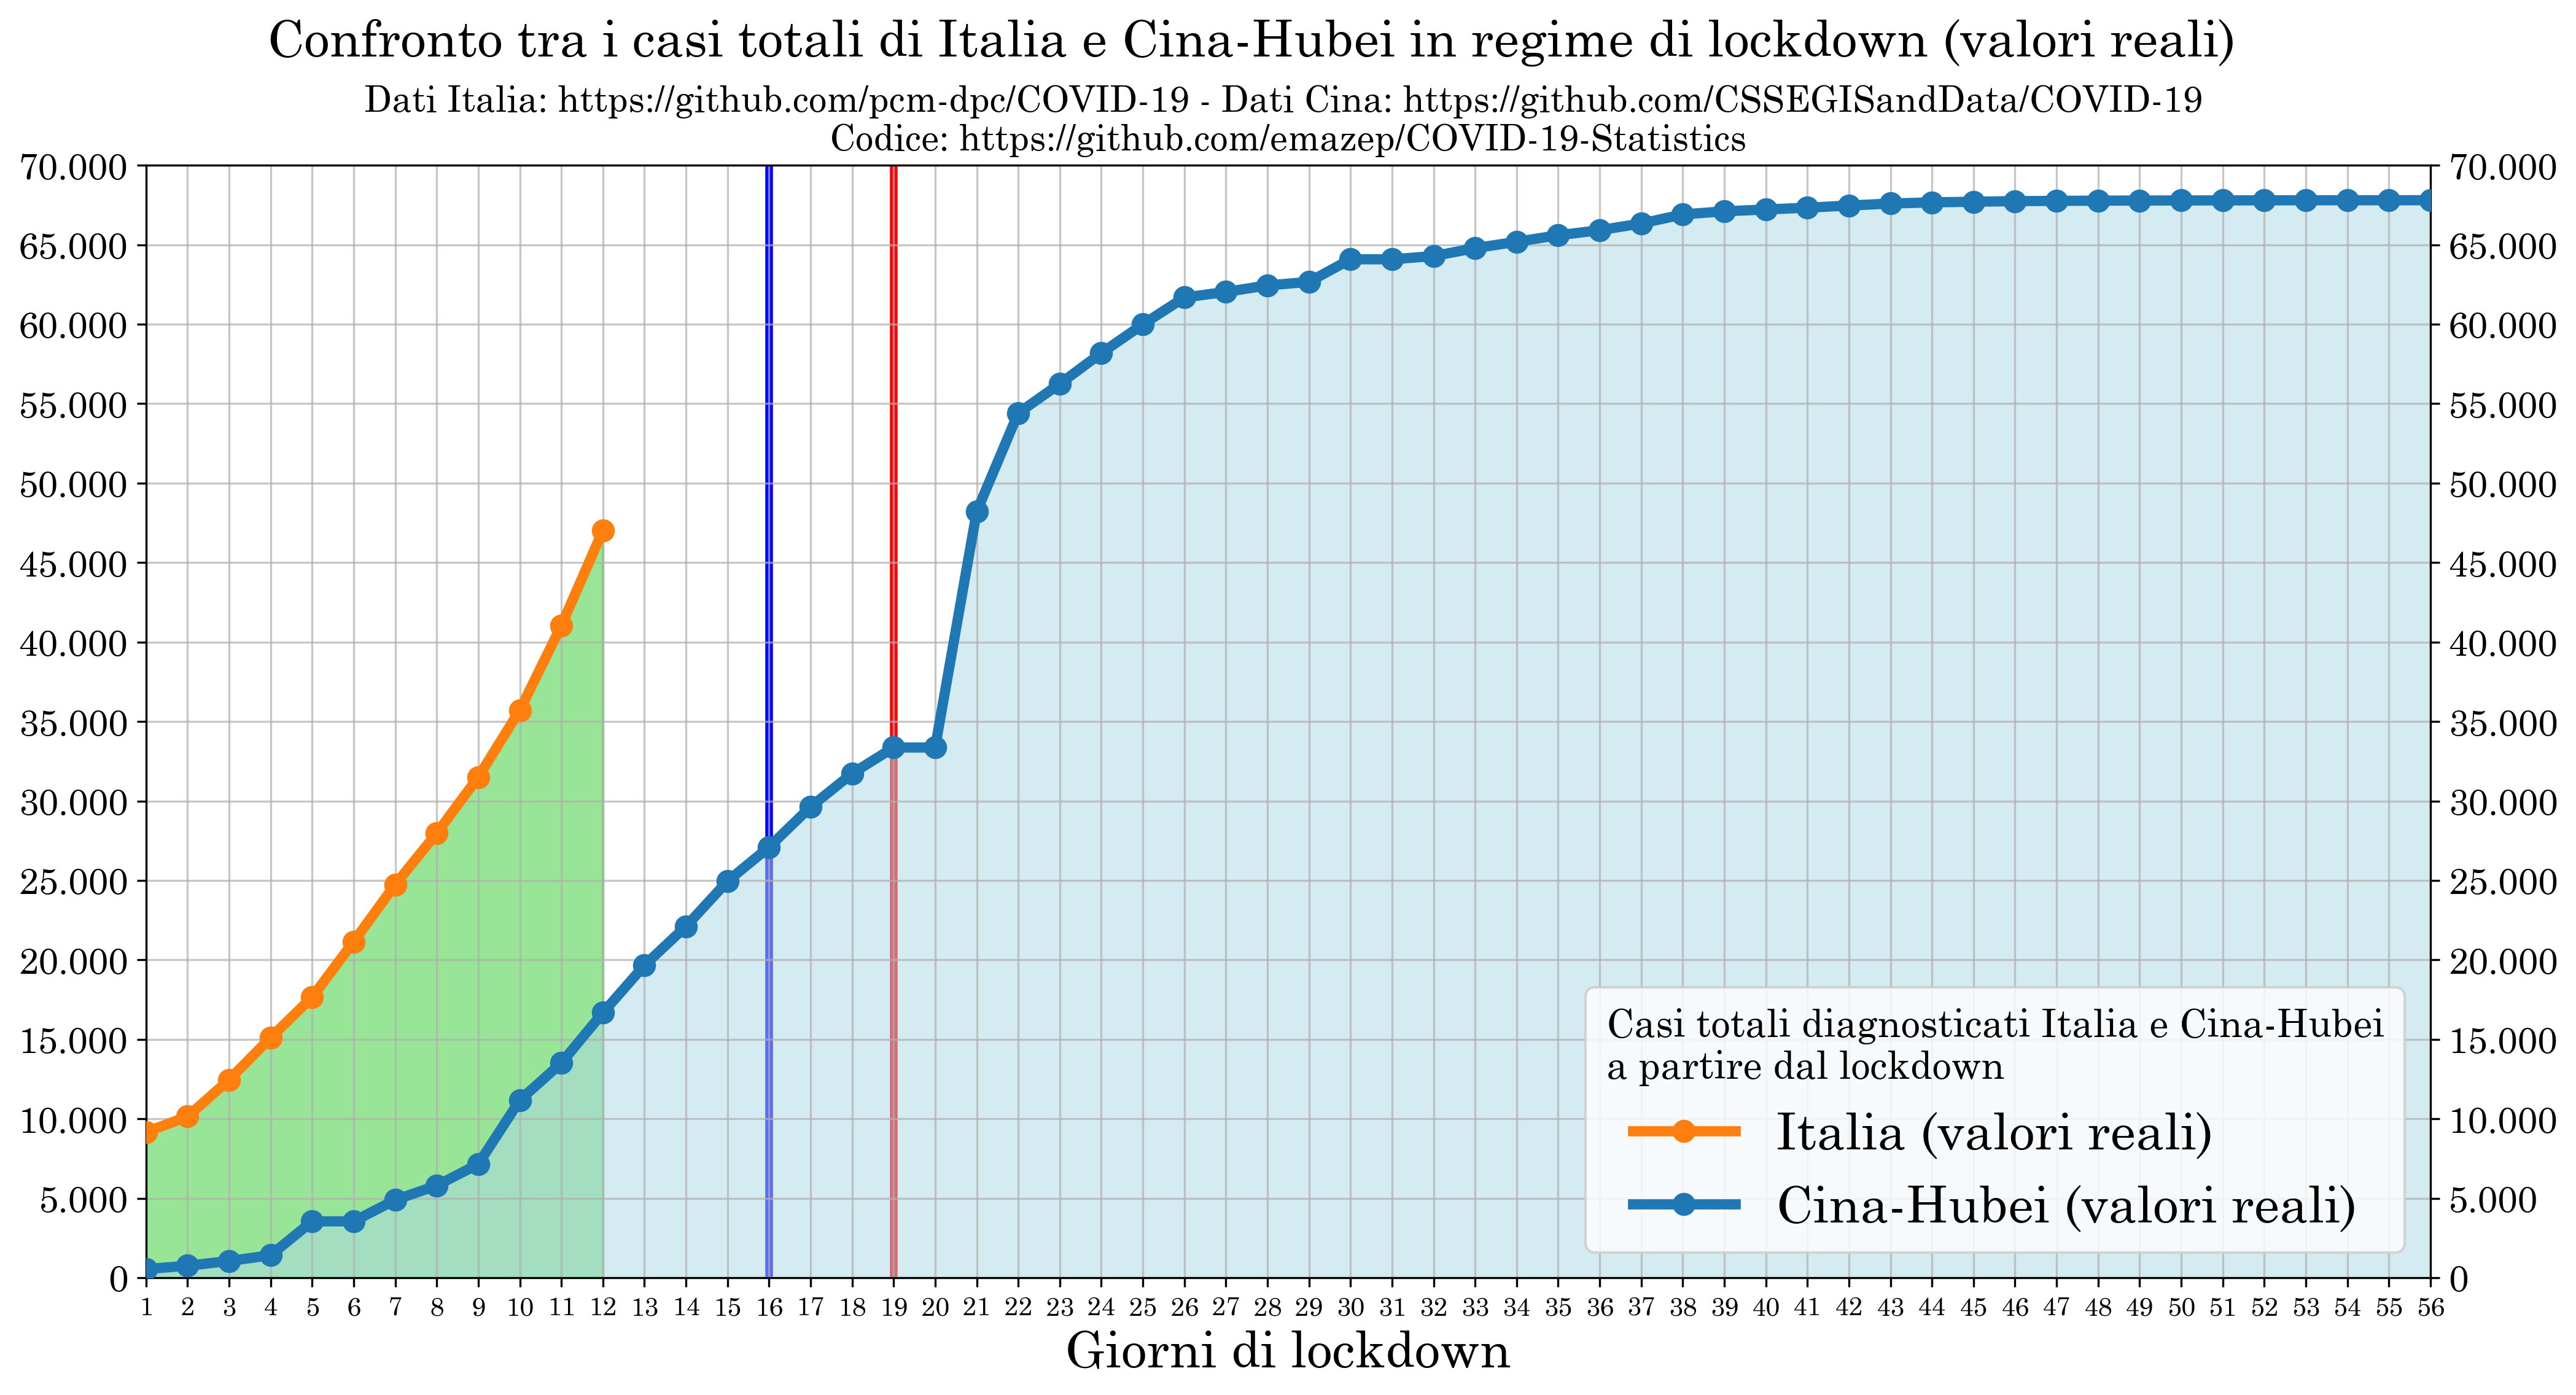

In [77]:
# Growth factor
SLACK = 0.5
ALPHA = 0.7

ax = df_sided_plot_long.plot(
    y=['totale_casi_hubei', 'totale_casi'], label=['Cina-Hubei (valori reali)', 'Italia (valori reali)'], **common_plt_params, marker='o', figsize=(16, 8), zorder=3
)
plt.fill_between(df_sided_plot_long.index, df_sided_plot_long['totale_casi'], color='limegreen', alpha=0.5)
plt.fill_between(df_sided_plot_long.index, df_sided_plot_long['totale_casi_hubei'], color='lightblue', alpha=0.5)

ax.tick_params(axis='x', which='both', labelsize=10)
#plt.xticks(range(1,57), list(range(1,16))+['Inizio\ncrescita\nlineare']+list(range(17,19))+['Inizio\ncrescita\nsublineare']+list(range(20,57)))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5_000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))
ax.tick_params(axis='y', which='both', labelsize=14)

ax.grid(which='both', alpha=ALPHA)
ax.tick_params(axis='y', which='both', right=True, labelright=True)

plt.axvline(x=16, linewidth=3, zorder=0, color='blue')
plt.axvline(x=19, linewidth=3, zorder=0, color='red')

plt.ylim(bottom=0, top=70_000)
plt.xlabel('Giorni di lockdown', fontsize=20)

ax.set_title(SUBTITLE, fontsize=14)
plt.suptitle('Confronto tra i casi totali di Italia e Cina-Hubei in regime di lockdown (valori reali)', fontsize=20)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="Casi totali diagnosticati Italia e Cina-Hubei\na partire dal lockdown", fontsize=20)

fig_ita_chn = plt.gcf()

plt.show()

In [78]:
fig_ita_chn_corrected_scaled.savefig('200_ita_chn_corr_scal.png', transparent=False)
fig_ita_chn_corrected.savefig('201_ita_chn_corr.png', transparent=False)
fig_ita_chn.savefig('202_ita_chn', transparent=False)